# Capstone Project 20.1: Initial Report and Exploratory Data Analysis (EDA)

### Overview: 

(1) Project Organization
· README file with a summary of findings and link to your Jupyter Notebook
· Jupyter Notebook with headings and text appropriately formatted
· Libraries are imported and aliased correctly
· Code does not contain errors
· No long strings of code output
· Demonstrates competency with pandas
· Demonstrates competency with seaborn
· Variables are sensible 

(2) Syntax and Code Quality
· Libraries are imported and aliased correctly
· Code does not contain errors
· No long strings of code output
· Demonstrates competency with pandas
· Demonstrates competency with seaborn
· Variables are sensible

(3) This criterion is linked to a Learning OutcomeVisualizations
· Appropriate plots for categorical and continuous variables are utilized

(4) This criterion is linked to a Learning OutcomeModeling
· Use of multiple regression or classification models
Cross-validation of models
· Grid Search hyperparameters



### Business Understanding

(1) Business Objectives: The research question you intend to answer (one sentence, if possible): Identification of key factors for HCC patent survival

(2) Background: the expected data source(s) (either a link to existing data or a sentence describing where you will source the data from): https://archive.ics.uci.edu/ml/datasets/HCC%2BSurvival (Links to an external site.)

(3) Business Success Criteria: The techniques you expect to use in your analysis: K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines

(4) The expected results: Identification of key factors for HCC patent survival
Why this question is important: It is a very important prediction for patients and their family, it paves the biomarker method to identify patients who should explore or benefit investigational new drugs by FDA.  
We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Assess Situation
(1) Inventory of Resources: class chat and with mentor 1 on 1 meetings, python and modeling, and other previous trainings in this course.

(2) Requirements, Assumptions, and Constraints: this is a practice work due by the end of the course, no legal issue with data usage. The assumptions are good data collection in the public database. Due to the limiation of CPU power, a relatively small dateset was used.

(3) Risks and Contingencies terminology: The success may rely on good analysis skillset of the performer in this case.

(4) Costs and Benefits: It is a good business model which could be used for not only HCC but also other cancer types



### Determine Data Mining Goals
（1） Data Mining Goals：Predict the HCC patient survial based on their conditions and find the correlations between different features and surival status.

（2） Data Mining Success Criteria：plot the figure to cover all the features in the dataset.

### Produce Project Plan
（1） Project Plan：the CRISP-DM standard protocol will be carried out, in total, 16 hrs for data understanding/preparation/modeling/evaluation/deployment

（2） Initial Assessment of Tools and Techniques：compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM model and provide the best sample and best hyperparameters through Grid search. 

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many features were included and whether we can make use of them efficiently? 

By strict definiation, this dataset provide a relative small sample size but with a lot of useful features with final readout as survial or not. It is a good case for us to build the concept of training model to predict the outcome of the patient. Surely a larger dataset could be further applied to improve the model. 

### Data Preparation: Read in the Data

Use pandas to read in the dataset `hcc-data.txt` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config("figure")

In [2]:
import os
print(os.getcwd())

C:\Users\klxd537\Documents\GitHub\2023\Module 20


In [7]:
# load data from https://archive.ics.uci.edu/ml/datasets/HCC%2BSurvival
df = pd.read_csv('hcc-survival/hcc-survival/hcc-data.txt', sep=",", header=None)

In [8]:
#take the first view of the data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1


In [9]:
# from this, we can observe the features with datatype(object and int64) and whether we will have to deal with NAN values. for preprocessing data before training, very good database with all the values on target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       165 non-null    int64 
 1   1       165 non-null    object
 2   2       165 non-null    int64 
 3   3       165 non-null    object
 4   4       165 non-null    object
 5   5       165 non-null    object
 6   6       165 non-null    object
 7   7       165 non-null    int64 
 8   8       165 non-null    object
 9   9       165 non-null    object
 10  10      165 non-null    object
 11  11      165 non-null    object
 12  12      165 non-null    object
 13  13      165 non-null    object
 14  14      165 non-null    object
 15  15      165 non-null    object
 16  16      165 non-null    object
 17  17      165 non-null    object
 18  18      165 non-null    object
 19  19      165 non-null    object
 20  20      165 non-null    object
 21  21      165 non-null    object
 22  22      165 non-null    ob

In [10]:
# found feature names from description file 
df.columns = ["Gender",
"Symptoms",
"Alcohol",
"Hepatitis B Surface Antigen",
"Hepatitis B e Antigen",
"Hepatitis B Core Antibody: nominal",
"Hepatitis C Virus Antibody: nominal",
"Cirrhosis : nominal",
"Endemic Countries: nominal",
"Smoking: nominal",
"Diabetes: nominal",
"Obesity: nominal",
"Hemochromatosis: nominal",
"Arterial Hypertension: nominal",
"Chronic Renal Insufficiency: nominal",
"Human Immunodeficiency Virus: nominal",
"Nonalcoholic Steatohepatitis: nominal",
"Esophageal Varices: nominal",
"Splenomegaly: nominal",
"Portal Hypertension: nominal",
"Portal Vein Thrombosis: nominal",
"Liver Metastasis: nominal",
"Radiological Hallmark: nominal",
"Age at diagnosis: integer",
"Grams of Alcohol per day: continuous",
"Packs of cigarets per year: continuous",
"Performance Status: ordinal",
"Encefalopathy degree: ordinal",
"Ascites degree: ordinal",
"International Normalised Ratio: continuous",
"Alpha-Fetoprotein (ng/mL): continuous",
"Haemoglobin (g/dL): continuous",
"Mean Corpuscular Volume (fl): continuous",
"Leukocytes(G/L): continuous",
"Platelets (G/L): continuous",
"Albumin (mg/dL): continuous",
"Total Bilirubin(mg/dL): continuous",
"Alanine transaminase (U/L): continuous",
"Aspartate transaminase (U/L): continuous",
"Gamma glutamyl transferase (U/L): continuous",
"Alkaline phosphatase (U/L): continuous",
"Total Proteins (g/dL): continuous",
"Creatinine (mg/dL): continuous",
"Number of Nodules: integer",
"Major dimension of nodule (cm): continuous",
"Direct Bilirubin (mg/dL): continuous",
"Iron (mcg/dL): continuous",
"Oxygen Saturation (%): continuous",
"Ferritin (ng/mL): continuous",
"Class: nominal (1 if patient survives, 0 if patient died)"]

In [11]:
#find out the data after adding the correct column names
df.info

<bound method DataFrame.info of      Gender Symptoms  Alcohol Hepatitis B Surface Antigen  \
0         1        0        1                           0   
1         0        ?        0                           0   
2         1        0        1                           1   
3         1        1        1                           0   
4         1        1        1                           1   
..      ...      ...      ...                         ...   
160       0        0        1                           ?   
161       0        1        0                           ?   
162       1        0        1                           0   
163       1        0        1                           1   
164       1        1        1                           0   

    Hepatitis B e Antigen Hepatitis B Core Antibody: nominal  \
0                       0                                  0   
1                       0                                  0   
2                       0                  

In [12]:
# redo num data (double check and confirm what need to be done with nan data and normalization)
data.describe()

,0,2,7,23,26,49
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.806061,0.739394,0.903030,64.690909,1.018182,0.618182
std,0.396586,0.440302,0.296817,13.319534,1.181528,0.487311
min,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,57.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,66.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,74.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,93.000000,4.000000,1.000000


In [14]:
# now we have data and feature with description within the name
df

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody: nominal,Hepatitis C Virus Antibody: nominal,Cirrhosis : nominal,Endemic Countries: nominal,Smoking: nominal,...,Alkaline phosphatase (U/L): continuous,Total Proteins (g/dL): continuous,Creatinine (mg/dL): continuous,Number of Nodules: integer,Major dimension of nodule (cm): continuous,Direct Bilirubin (mg/dL): continuous,Iron (mcg/dL): continuous,Oxygen Saturation (%): continuous,Ferritin (ng/mL): continuous,"Class: nominal (1 if patient survives, 0 if patient died)"
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,1,?,?,?,1,1,0,1,...,109,7.6,0.7,5,3,?,?,?,?,1
161,0,1,0,?,?,?,?,1,0,0,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,1,0,1,0,0,0,0,1,0,1,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,1,0,1,1,0,1,1,1,1,1,...,170,8.4,0.74,5,18,?,?,?,?,0


In [16]:
#take the overview of all the datatypes 
df.dtypes

Gender                                                        int64
Symptoms                                                     object
Alcohol                                                       int64
Hepatitis B Surface Antigen                                  object
Hepatitis B e Antigen                                        object
Hepatitis B Core Antibody: nominal                           object
Hepatitis C Virus Antibody: nominal                          object
Cirrhosis : nominal                                           int64
Endemic Countries: nominal                                   object
Smoking: nominal                                             object
Diabetes: nominal                                            object
Obesity: nominal                                             object
Hemochromatosis: nominal                                     object
Arterial Hypertension: nominal                               object
Chronic Renal Insufficiency: nominal            

### Further analysis and understand the biology: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
Gender                                                        int64
Symptoms                                                     object
Alcohol                                                       int64
Hepatitis B Surface Antigen                                  object
Hepatitis B e Antigen                                        object
Hepatitis B Core Antibody: nominal                           object
Hepatitis C Virus Antibody: nominal                          object
Cirrhosis : nominal                                           int64
Endemic Countries: nominal                                   object
Smoking: nominal                                             object
Diabetes: nominal                                            object
Obesity: nominal                                             object
Hemochromatosis: nominal                                     object
Arterial Hypertension: nominal                               object
Chronic Renal Insufficiency: nominal                         object
Human Immunodeficiency Virus: nominal                        object
Nonalcoholic Steatohepatitis: nominal                        object
Esophageal Varices: nominal                                  object
Splenomegaly: nominal                                        object
Portal Hypertension: nominal                                 object
Portal Vein Thrombosis: nominal                              object
Liver Metastasis: nominal                                    object
Radiological Hallmark: nominal                               object
Age at diagnosis: integer                                     int64
Grams of Alcohol per day: continuous                         object
Packs of cigarets per year: continuous                       object
Performance Status: ordinal                                   int64
Encefalopathy degree: ordinal                                object
Ascites degree: ordinal                                      object
International Normalised Ratio: continuous                   object
Alpha-Fetoprotein (ng/mL): continuous                        object
Haemoglobin (g/dL): continuous                               object
Mean Corpuscular Volume (fl): continuous                     object
Leukocytes(G/L): continuous                                  object
Platelets (G/L): continuous                                  object
Albumin (mg/dL): continuous                                  object
Total Bilirubin(mg/dL): continuous                           object
Alanine transaminase (U/L): continuous                       object
Aspartate transaminase (U/L): continuous                     object
Gamma glutamyl transferase (U/L): continuous                 object
Alkaline phosphatase (U/L): continuous                       object
Total Proteins (g/dL): continuous                            object
Creatinine (mg/dL): continuous                               object
Number of Nodules: integer                                   object
Major dimension of nodule (cm): continuous                   object
Direct Bilirubin (mg/dL): continuous                         object
Iron (mcg/dL): continuous                                    object
Oxygen Saturation (%): continuous                            object
Ferritin (ng/mL): continuous                                 object

Output variable (desired target):
Class: nominal (1 if patient survives, 0 if patient died)     int64
dtype: object



In [17]:
# first of all, let us find the unique values in column, which will help us decide which feature would need to be/how to be modifed to prepare the training
for column in df:
  print(df[column].unique())

[1 0]
['0' '?' '1']
[1 0]
['0' '1' '?']
['0' '?' '1']
['0' '1' '?']
['0' '1' '?']
[1 0]
['0' '?' '1']
['1' '?' '0']
['1' '0' '?']
['?' '0' '1']
['1' '0' '?']
['0' '1' '?']
['0' '1' '?']
['0' '?' '1']
['0' '?' '1']
['1' '0' '?']
['0' '1' '?']
['0' '1' '?']
['0' '1' '?']
['0' '1' '?']
['1' '0' '?']
[67 62 78 77 76 75 49 61 50 43 41 74 66 56 63 72 60 64 71 73 84 80 45 57
 20 70 59 86 52 58 27 51 81 65 82 68 40 88 23 83 69 79 87 93 85 55 46 25
 36 47 44]
['137' '0' '50' '40' '100' '?' '200' '500' '80' '180' '150' '60' '20'
 '120' '75' '70' '300' '90' '96' '250']
['15' '?' '50' '30' '0' '20' '32' '60' '78' '47' '16' '67.5' '2' '8' '80'
 '40' '10' '44' '48' '34.5' '33' '1' '7.5' '43' '23' '52.5' '510' '12'
 '37' '18' '25']
[0 2 1 3 4]
['1' '2' '?' '3']
['1' '2' '3' '?']
['1.53' '?' '0.96' '0.95' '0.94' '1.58' '1.4' '1.46' '3.14' '1.12' '1.05'
 '1.33' '1.2' '1.25' '1.61' '2.14' '1.13' '1.44' '1.29' '1.06' '1.27'
 '4.82' '1.74' '1.38' '1.37' '1.3' '1.21' '1.19' '1.32' '1.24' '1.28' '2'
 '1.09'

In [18]:
#we can observe the weight which could impact our training(normalization will be highly recommended since they have quite different mean values)
df.describe()

,Gender,Alcohol,Cirrhosis : nominal,Age at diagnosis: integer,Performance Status: ordinal,"Class: nominal (1 if patient survives, 0 if patient died)"
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.806061,0.739394,0.903030,64.690909,1.018182,0.618182
std,0.396586,0.440302,0.296817,13.319534,1.181528,0.487311
min,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,57.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,66.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,74.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,93.000000,4.000000,1.000000


### Business task: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task: The expected results: Identification of key factors for HCC patent survival and build a model to predict the survival of HCC patients 

In [20]:
# find out the data info of the wohle dataset, and prep for the next step to figure out the big picture. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Gender                                                     165 non-null    int64 
 1   Symptoms                                                   165 non-null    object
 2   Alcohol                                                    165 non-null    int64 
 3   Hepatitis B Surface Antigen                                165 non-null    object
 4   Hepatitis B e Antigen                                      165 non-null    object
 5   Hepatitis B Core Antibody: nominal                         165 non-null    object
 6   Hepatitis C Virus Antibody: nominal                        165 non-null    object
 7   Cirrhosis : nominal                                        165 non-null    int64 
 8   Endemic Countries: n

In [ ]:
 Business Objective: find the most important feature(s) to predict the survial of HCC patietns. 

### Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [21]:
#simpify the features so we pick only several important ones known to be related to HCC survial 
df1 = df[["Alcohol", "Cirrhosis : nominal", "Age at diagnosis: integer", "Class: nominal (1 if patient survives, 0 if patient died)"]]

In [22]:
# before processing the data, let us find the unique values in df1, which will help us decide which feature would need to be/how to be modifed to prepare the training
for column in df1:
  print(df1[column].unique())

[1 0]
[1 0]
[67 62 78 77 76 75 49 61 50 43 41 74 66 56 63 72 60 64 71 73 84 80 45 57
 20 70 59 86 52 58 27 51 81 65 82 68 40 88 23 83 69 79 87 93 85 55 46 25
 36 47 44]
[1 0]


In [23]:
# new dataset prepared and take the first view
df1.head()

,Alcohol,Cirrhosis : nominal,Age at diagnosis: integer,"Class: nominal (1 if patient survives, 0 if patient died)"
0,1,1,67,1
1,0,1,62,1
2,1,1,78,1
3,1,1,77,0
4,1,1,76,1


In [24]:
# further check the features with count, mean, std and min in this sub-dataframe
df1.describe()

,Alcohol,Cirrhosis : nominal,Age at diagnosis: integer,"Class: nominal (1 if patient survives, 0 if patient died)"
count,165.000000,165.000000,165.000000,165.000000
mean,0.739394,0.903030,64.690909,0.618182
std,0.440302,0.296817,13.319534,0.487311
min,0.000000,0.000000,20.000000,0.000000
25%,0.000000,1.000000,57.000000,0.000000
50%,1.000000,1.000000,66.000000,1.000000
75%,1.000000,1.000000,74.000000,1.000000
max,1.000000,1.000000,93.000000,1.000000


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   Alcohol                                                    165 non-null    int64
 1   Cirrhosis : nominal                                        165 non-null    int64
 2   Age at diagnosis: integer                                  165 non-null    int64
 3   Class: nominal (1 if patient survives, 0 if patient died)  165 non-null    int64
dtypes: int64(4)
memory usage: 5.3 KB


### Train/Test Split

With your data prepared, split it into a train and test set.

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
# for a simplified version with all the columns processed and visulize the label

for i in range(0,df1.shape[1]):
    if df1.dtypes[i]=='object':
        df1[df1.columns[i]] = encoder.fit_transform(df1[df1.columns[i]])
        df1_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        print(df1_name_mapping)

In [29]:
#another overview of all the changes in this case
df1

,Alcohol,Cirrhosis : nominal,Age at diagnosis: integer,"Class: nominal (1 if patient survives, 0 if patient died)"
0,1,1,67,1
1,0,1,62,1
2,1,1,78,1
3,1,1,77,0
4,1,1,76,1
...,...,...,...,...
160,1,1,40,1
161,0,1,68,0
162,1,1,65,1
163,1,1,44,0


In [30]:
import plotly.express as px
import seaborn as sns

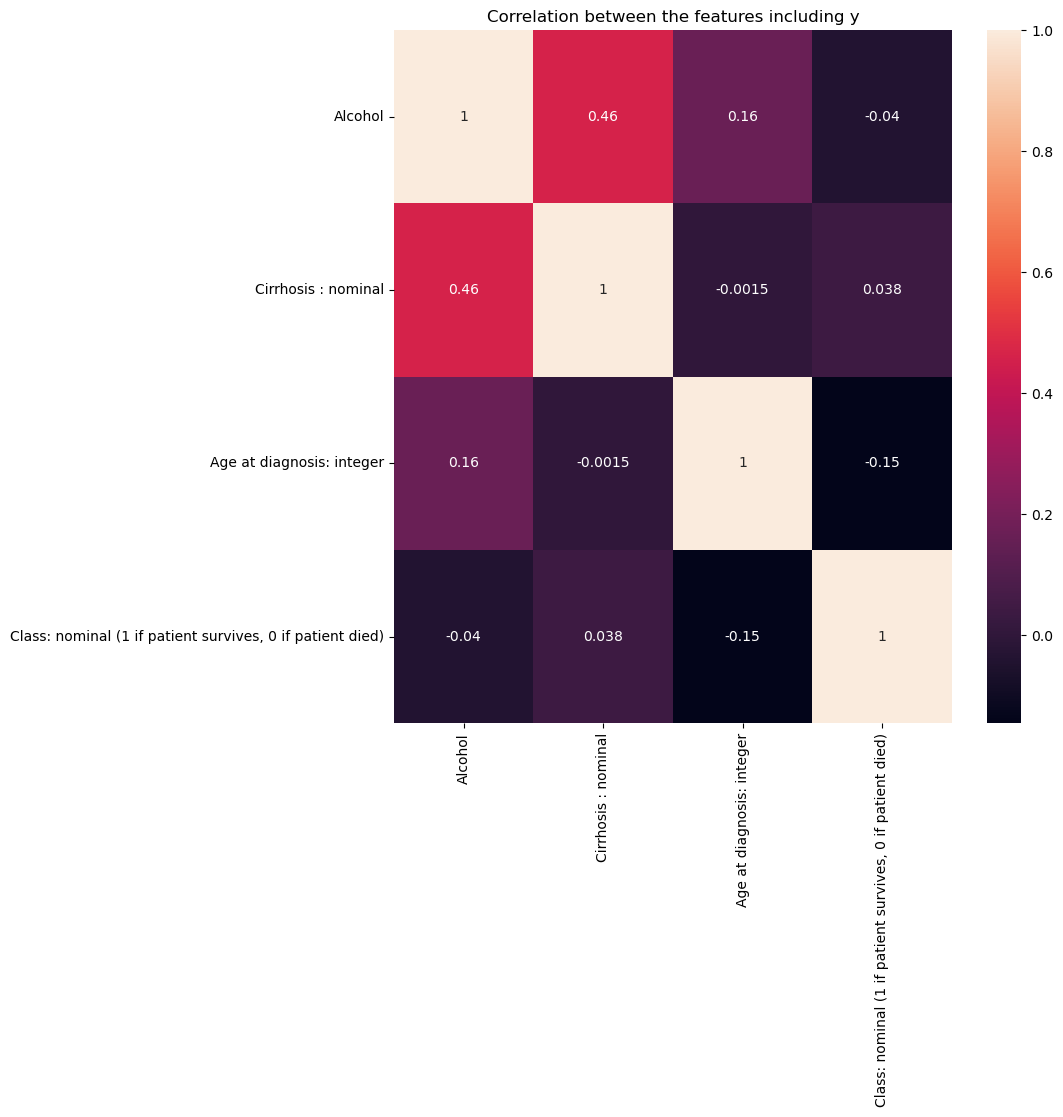

In [31]:
# now we can plot the figure to understand the correlation better/easier,we did not see any feature with strong coorelation to y(subsription) or each other. 
plt.figure(figsize=(9,9))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation between the features including y')
plt.show()

In [35]:
# for a simplified version with all the columns processed and visulize the label
encoder = LabelEncoder()
for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = encoder.fit_transform(df[df.columns[i]])
        df_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        print(df_name_mapping)
    



{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '1': 1, '?': 2}
{'0': 0, '100': 1, '120': 2, '137': 3, '150': 4, '180': 5, '20': 6, '200': 7, '250': 8, '300': 9, '40': 10, '50': 11, '500': 12, '60': 13, '70': 14, '75': 15, '80': 16, '90': 17, '96': 18, '?': 19}
{'0': 0, '1': 1, '10': 2, '12': 3, '15': 4, '16': 5, '18': 6, '2': 7, '20': 8, '23': 9, '25': 10, '30': 11, '32': 12, '33': 13, '34.5': 14, '37': 15, '40': 16, '43': 17, '44': 18, '47': 19, '48': 20, '50': 21, '510': 22, '52.5': 23, '60': 24, '67.5': 25, '7.5': 26, '78': 27, '8': 28, '80': 29, '?': 30

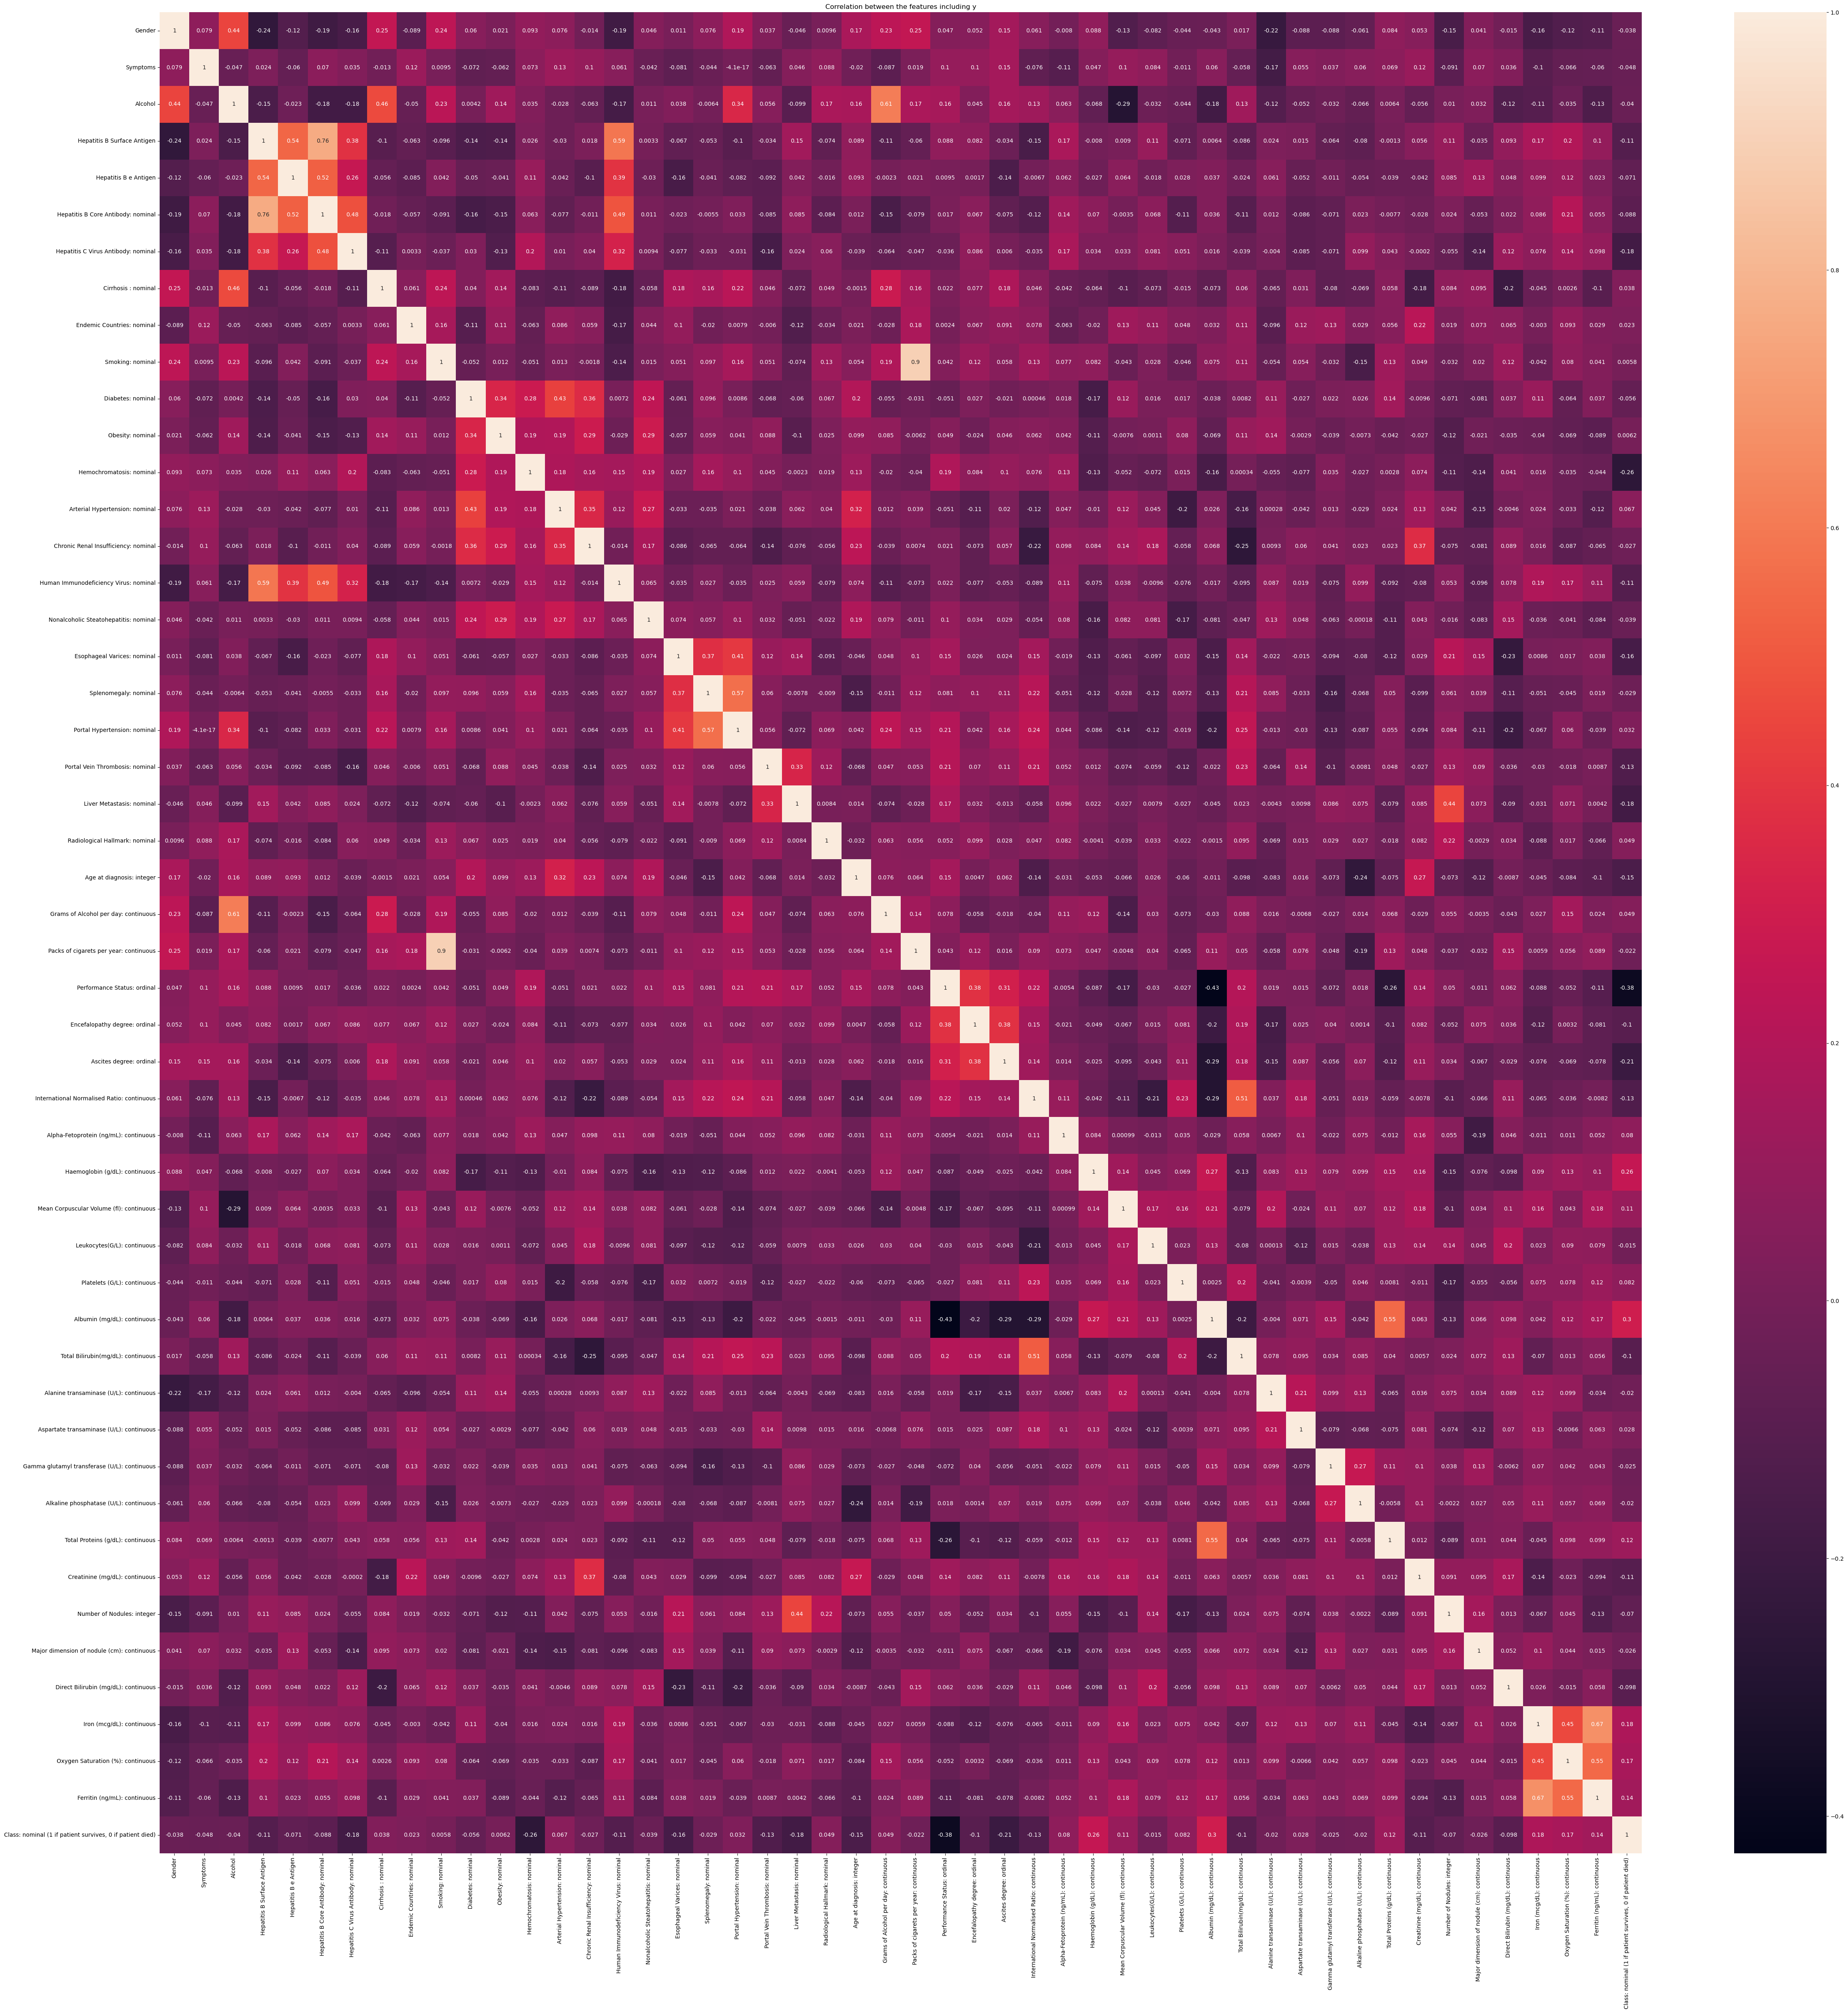

In [37]:
# secondly, what if we want to check all the features, can we process them? we can plot the figure to understand the correlation better/easier,we did not see any feature with strong coorelation to y(subsription) or each other. 
plt.figure(figsize=(59,59))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the features including y')
plt.show()

<AxesSubplot:xlabel='Class: nominal (1 if patient survives, 0 if patient died)', ylabel='count'>

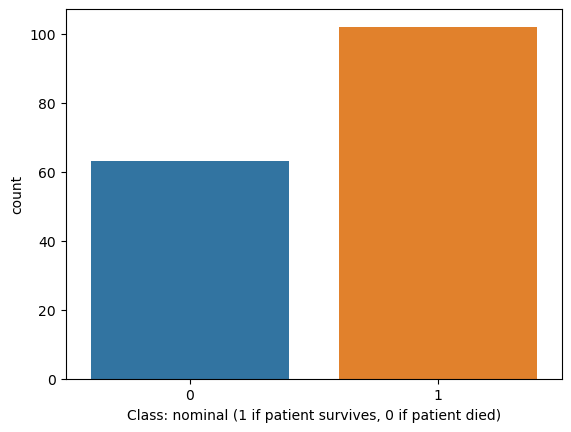

In [38]:
#we can check the data distribution with much more no than yes. 
sns.countplot(x='Class: nominal (1 if patient survives, 0 if patient died)',  data=df1)

In [115]:
# Split the data into training and testing sets (30% for testing and 42 random state for repeating and confirmation check)
X = df1.drop('Class: nominal (1 if patient survives, 0 if patient died)', axis=1)
y = df1['Class: nominal (1 if patient survives, 0 if patient died)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Build the First Model

Before we build our first model with SVM classifier, we want to establish a baseline.  It is the basic performance and we will then futher optimize the model as well as exploring other models.

In [116]:
# Initialize the SVM classifier as our baseline model, we will explore more in the next section
svm = SVC(kernel='linear')

# Train the model with linear kernel SVC and no hyperparameters were explored to optimize the model 
svm.fit(X_train, y_train)

# Make predictions in this case just focus on test in case overfitting of the train dataset
y_pred = svm.predict(X_test)

# Calculate and display some but not great metrics 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred_proba)

print("SVC metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
#print(f"ROC-AUC: {roc_auc}")

SVC metrics:
Accuracy: 0.7058823529411765
Precision: 0.6666666666666666
Recall: 1.0
F1-score: 0.8


### Explore Logistic Regression model

Use Logistic Regression to build a basic model on the same dataset.  

In [117]:
# Initialize the logistic regression model which we chose 4000 iterations 
log_reg = LogisticRegression(max_iter=4000)

# Train the model first
log_reg.fit(X_train, y_train)

# Make predictions using the model 
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate and show case the paramters could be useful for the next step
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Logistic Regression metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

Logistic Regression metrics:
Accuracy: 0.5882352941176471
ROC-AUC: 0.6571428571428571


### Best model and best features

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  

In [118]:
# Train and evaluate the four models as planned 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report
import time

# Initialize the four classifiers ot compare the methods in accuary and running time
lr = LogisticRegression(max_iter=4000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')


regression_methods = [('Logistic Regression', lr), ('Decision Tree', dt), ('KNN', knn), ('SVM', svm)]


for name, clf in regression_methods:
    start_time = time.time()
    
    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    y_predtrain = clf.predict(X_train)

    # Calculate and display metrics
    Test_accuracy = accuracy_score(y_test, y_pred)
    Train_accuracy = accuracy_score(y_train, y_predtrain)

    print(f"{name} - training model:")
    print(f"{name} - Test accuracy: {Test_accuracy: .2f}")
    print(f"{name} - Train accuracy: {Train_accuracy: .2f}")

    # Measure the training end time
    end_time = time.time()

    # Calculate and display execution time
    Traintime = end_time - start_time
    print(f"{name} - Train Time: {Traintime:.2f} seconds\n")

Logistic Regression - training model:
Logistic Regression - Test accuracy:  0.59
Logistic Regression - Train accuracy:  0.64
Logistic Regression - Train Time: 0.04 seconds

Decision Tree - training model:
Decision Tree - Test accuracy:  0.29
Decision Tree - Train accuracy:  1.00
Decision Tree - Train Time: 0.02 seconds

KNN - training model:
KNN - Test accuracy:  0.53
KNN - Train accuracy:  0.72
KNN - Train Time: 0.01 seconds

SVM - training model:
SVM - Test accuracy:  0.71
SVM - Train accuracy:  0.64
SVM - Train Time: 0.18 seconds



In [167]:
#transform data to dataframe and present, all of them showed good accuray in test and train, however, big difference in training time is oberved


data = {'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM'], 'Train Time': ['0.04', '0.02', '0.01', '0.18'], 'Train Accuracy': ['0.64', '1.00', '0.72', '0.64'] , 'Test Accuracy': ['0.59', '0.29', '0.53', '0.71']}
df3 = pd.DataFrame(data)
print(df3)

                 Model Train Time Train Accuracy Test Accuracy
0  Logistic Regression       0.04           0.64          0.59
1        Decision Tree       0.02           1.00          0.29
2                  KNN       0.01           0.72          0.53
3                  SVM       0.18           0.64          0.71


### Improving the Model and finalize the features best predict the HCC patient survival

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


In [168]:
#based on the feature screening of correlation, we found that positively related features from top 3: Alcohol, Cirrhosis : nominal, Smoking: nominal 
#Alanine transaminase (U/L): continuous, Age at diagnosis: integer ,Number of Nodules: integer, Hepatitis B Surface Antigen, Arterial Hypertension: nominal, Hepatitis C Virus Antibody: nominal.
df4 = df1 = df[['Alcohol', 'Cirrhosis : nominal', 'Hepatitis B Surface Antigen', 'Arterial Hypertension: nominal', 'Hepatitis C Virus Antibody: nominal', 'Smoking: nominal', 'Alanine transaminase (U/L): continuous', 'Number of Nodules: integer', 'Age at diagnosis: integer', 'Class: nominal (1 if patient survives, 0 if patient died)']]
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   Alcohol                                                    165 non-null    int64
 1   Cirrhosis : nominal                                        165 non-null    int64
 2   Hepatitis B Surface Antigen                                165 non-null    int32
 3   Arterial Hypertension: nominal                             165 non-null    int32
 4   Hepatitis C Virus Antibody: nominal                        165 non-null    int32
 5   Smoking: nominal                                           165 non-null    int32
 6   Alanine transaminase (U/L): continuous                     165 non-null    int32
 7   Number of Nodules: integer                                 165 non-null    int32
 8   Age at diagnosis: integer     

Feature list:
 0   Gender                                                     165 non-null    int64 
 1   Symptoms                                                   165 non-null    object
 2   Alcohol                                                    165 non-null    int64 
 3   Hepatitis B Surface Antigen                                165 non-null    object
 4   Hepatitis B e Antigen                                      165 non-null    object
 5   Hepatitis B Core Antibody: nominal                         165 non-null    object
 6   Hepatitis C Virus Antibody: nominal                        165 non-null    object
 7   Cirrhosis : nominal                                        165 non-null    int64 
 8   Endemic Countries: nominal                                 165 non-null    object
 9   Smoking: nominal                                           165 non-null    object
 10  Diabetes: nominal                                          165 non-null    object
 11  Obesity: nominal                                           165 non-null    object
 12  Hemochromatosis: nominal                                   165 non-null    object
 13  Arterial Hypertension: nominal                             165 non-null    object
 14  Chronic Renal Insufficiency: nominal                       165 non-null    object
 15  Human Immunodeficiency Virus: nominal                      165 non-null    object
 16  Nonalcoholic Steatohepatitis: nominal                      165 non-null    object
 17  Esophageal Varices: nominal                                165 non-null    object
 18  Splenomegaly: nominal                                      165 non-null    object
 19  Portal Hypertension: nominal                               165 non-null    object
 20  Portal Vein Thrombosis: nominal                            165 non-null    object
 21  Liver Metastasis: nominal                                  165 non-null    object
 22  Radiological Hallmark: nominal                             165 non-null    object
 23  Age at diagnosis: integer                                  165 non-null    int64 
 24  Grams of Alcohol per day: continuous                       165 non-null    object
 25  Packs of cigarets per year: continuous                     165 non-null    object
 26  Performance Status: ordinal                                165 non-null    int64 
 27  Encefalopathy degree: ordinal                              165 non-null    object
 28  Ascites degree: ordinal                                    165 non-null    object
 29  International Normalised Ratio: continuous                 165 non-null    object
 30  Alpha-Fetoprotein (ng/mL): continuous                      165 non-null    object
 31  Haemoglobin (g/dL): continuous                             165 non-null    object
 32  Mean Corpuscular Volume (fl): continuous                   165 non-null    object
 33  Leukocytes(G/L): continuous                                165 non-null    object
 34  Platelets (G/L): continuous                                165 non-null    object
 35  Albumin (mg/dL): continuous                                165 non-null    object
 36  Total Bilirubin(mg/dL): continuous                         165 non-null    object
 37  Alanine transaminase (U/L): continuous                     165 non-null    object
 38  Aspartate transaminase (U/L): continuous                   165 non-null    object
 39  Gamma glutamyl transferase (U/L): continuous               165 non-null    object
 40  Alkaline phosphatase (U/L): continuous                     165 non-null    object
 41  Total Proteins (g/dL): continuous                          165 non-null    object
 42  Creatinine (mg/dL): continuous                             165 non-null    object
 43  Number of Nodules: integer                                 165 non-null    object
 44  Major dimension of nodule (cm): continuous                 165 non-null    object
 45  Direct Bilirubin (mg/dL): continuous                       165 non-null    object
 46  Iron (mcg/dL): continuous                                  165 non-null    object
 47  Oxygen Saturation (%): continuous                          165 non-null    object
 48  Ferritin (ng/mL): continuous                               165 non-null    object

In [178]:
# Split the data into training and testing sets (30% for testing and 42 random state for repeating and confirmation check)
X1 = df4.drop('Class: nominal (1 if patient survives, 0 if patient died)', axis=1)
y1 = df4['Class: nominal (1 if patient survives, 0 if patient died)']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print(X1_train)


     Alcohol  Cirrhosis : nominal  Hepatitis B Surface Antigen  \
84         0                    1                            0   
2          1                    1                            1   
94         1                    1                            0   
45         1                    1                            0   
42         1                    1                            0   
..       ...                  ...                          ...   
71         1                    1                            0   
106        1                    1                            0   
14         1                    1                            0   
92         1                    1                            0   
102        1                    1                            0   

     Arterial Hypertension: nominal  Hepatitis C Virus Antibody: nominal  \
84                                1                                    1   
2                                 1                    

In [170]:
# Train and evaluate the four models as planned 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report
import time

# Initialize the four classifiers ot compare the methods in accuary and running time
lr = LogisticRegression(max_iter=4000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')


regression_methods = [('Logistic Regression', lr), ('Decision Tree', dt), ('KNN', knn), ('SVM', svm)]


for name, clf in regression_methods:
    start_time = time.time()
    
    # Train the model
    clf.fit(X1_train, y1_train)

    # Make predictions
    y_pred = clf.predict(X1_test)
    y_predtrain = clf.predict(X1_train)

    # Calculate and display metrics
    Test_accuracy = accuracy_score(y1_test, y_pred)
    Train_accuracy = accuracy_score(y1_train, y_predtrain)

    print(f"{name} - training model:")
    print(f"{name} - Test accuracy: {Test_accuracy: .2f}")
    print(f"{name} - Train accuracy: {Train_accuracy: .2f}")

    # Measure the training end time
    end_time = time.time()
    
    # Calculate and display execution time
    Traintime = end_time - start_time
    print(f"{name} - Train Time: {Traintime:.2f} seconds\n")

Logistic Regression - training model:
Logistic Regression - Test accuracy:  0.59
Logistic Regression - Train accuracy:  0.64
Logistic Regression - Train Time: 0.05 seconds

Decision Tree - training model:
Decision Tree - Test accuracy:  0.35
Decision Tree - Train accuracy:  1.00
Decision Tree - Train Time: 0.01 seconds

KNN - training model:
KNN - Test accuracy:  0.53
KNN - Train accuracy:  0.72
KNN - Train Time: 0.01 seconds

SVM - training model:
SVM - Test accuracy:  0.71
SVM - Train accuracy:  0.64
SVM - Train Time: 0.16 seconds



In [180]:
# Initialize the logistic regression model which we chose 4000 iterations and much better accuray cn ROC-AUC were obtained than the previous features
log_reg = LogisticRegression(max_iter=4000)

# Train the model first
log_reg.fit(X1_train, y1_train)

# Make predictions using the model 
y1_pred = log_reg.predict(X1_test)
y1_pred_proba = log_reg.predict_proba(X1_test)[:, 1]

# Calculate and show case the paramters could be useful for the next step
accuracy = accuracy_score(y1_test, y1_pred)
roc_auc = roc_auc_score(y1_test, y1_pred_proba)

print("Logistic Regression metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

Logistic Regression metrics:
Accuracy: 0.6060606060606061
ROC-AUC: 0.6461538461538462


In [181]:
# Initialize the SVM classifier as our baseline model, we will explore more in the next section, we can see similar improvement on SVC method
svm = SVC(kernel='linear')

# Train the model with linear kernel SVC and no hyperparameters were explored to optimize the model 
svm.fit(X1_train, y1_train)

# Make predictions in this case just focus on test in case overfitting of the train dataset
y1_pred = svm.predict(X1_test)

# Calculate and display some but not great metrics 
accuracy = accuracy_score(y1_test, y1_pred)
roc_auc = roc_auc_score(y1_test, y1_pred_proba)

print("SVC metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

SVC metrics:
Accuracy: 0.6060606060606061
ROC-AUC: 0.6461538461538462


In [153]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config("figure")

In [154]:
#Select Modeling Technique : here we are going to start with lineareression then move forward with 
#Output: Modeling technique and Modelling assumptions

import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [182]:
# added scaler and similar accuray was obtained 
model_selector_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
                                ('scaler', StandardScaler()),
                                ('linreg', LinearRegression())])
model_selector_pipe.fit(X1_train, y1_train)
# Make predictions using the model 
y2_pred = log_reg.predict(X1_test)
y2_pred_proba = log_reg.predict_proba(X1_test)[:, 1]

# Calculate and show case the paramters could be useful for the next step
accuracy = accuracy_score(y1_test, y2_pred)
roc_auc = roc_auc_score(y1_test, y2_pred_proba)

print("Logistic Regression metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

Logistic Regression metrics:
Accuracy: 0.6060606060606061
ROC-AUC: 0.6461538461538462


In [183]:
%%time
#Hyperparameter tuning and grid search. All of our models have additional hyperparameters to tune and explore. 

#1st we are going to explore KNN with grid search to improve the model 

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X1_train, y1_train)



Fitting 10 folds for each of 19 candidates, totalling 190 fits
Wall time: 1.54 s


In [184]:
#find the best params for KNN
print(grid_search.best_params_)

{'n_neighbors': 3}


In [185]:
#look into the training dataset on accuracy 
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 61.43%


In [186]:
%%time
#2nd we are going to explore SVM with grid search to improve the model 
# defining parameter range, C was checked with 1, 10, 100 as well, gamma was checed at 0.1, 0.01 as well with lower than what is shown accuray, to save machine time, no details were shown here
param_grid = {'C': [1000], 
              'gamma': [0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search then we can find the best model in LR and fit the training dataset with accuray calculated in both training data and test data
grid.fit(X1_train, y1_train)
grid_train_acc = grid.score(X1_train, y1_train)
grid_test_acc = grid.score(X1_test, y1_test)
best_params = grid.best_params_

### check results
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.519 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.444 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.577 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.538 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.538 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.593 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.556 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.577 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.615 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.538 total time=   0.0s
Training Accuracy:  0.73
Test Accuracy:  0.64
Best parameters of tree: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Wall time: 15

In [187]:
%%time
#3rd we are going to explore decision tree with grid search to improve the model 
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}

#find the best model in LR and fit the training dataset with accuray calculated in both training data and test data
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X1_train, y1_train)
grid_train_acc = grid.score(X1_train, y1_train)
grid_test_acc = grid.score(X1_test, y1_test)
best_params = grid.best_params_

# print the data
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

Training Accuracy:  0.62
Trest Accuracy:  0.61
Best parameters of tree: {'max_depth': 2, 'min_impurity_decrease': 0.05, 'min_samples_split': 0.1}
Wall time: 970 ms


In [161]:
%%time
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X1_train,y1_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.6208791208791208
Wall time: 1.58 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the 

In [166]:
log_reg=LogisticRegression(C=0.1,penalty="l2")
log_reg.fit(X1_train,y1_train)
# Make predictions using the model 
y1_pred = log_reg.predict(X1_test)
y1_pred_proba = log_reg.predict_proba(X1_test)[:, 1]

# Calculate and show case the paramters could be useful for the next step
accuracy = accuracy_score(y1_test, y1_pred)
roc_auc = roc_auc_score(y1_test, y1_pred_proba)

print("Logistic Regression metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

Logistic Regression metrics:
Accuracy: 0.6363636363636364
ROC-AUC: 0.6384615384615384


### We can review the whole dataset with optimized table on training teim, train/test accurary, clearly we can see improvement and we can see that SVM provided the best results and the accuray will not be improved with more feature to be selected. The best test accuracy is at 0.71 with such a small dataset used in this analysis. It is very encouraging! 
SVM - training model:
SVM - Test accuracy:  0.71
SVM - Train accuracy:  0.64


### Evaluation
With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this. We should review our business objective and explore how well we can provide meaningful insight on HCC patient status. 

We understand the challenges is that due to the limitation of avaiablity of the HCC patients, the dataset is only a small cohort, but we want to test the hypothesis to see how powerful the tool could be made or we can achieve in this case

Future directions: Ai based model could do a much better job than SVM which is the chosen best model in this analysis. 

Access of data mining results with respect to business success creteria:
In principle, a business is based on the consistency of the model, which is shown not overfitting in this case (Train accuracy at 0.64, test accuracy at 0.71), the model(s) build here provided the inital analysis of the price which address the business quesiton of predicting the HCC patient surviaval status with a limited input of small data base.

Business Objectives: The goal is build the model to predict the HCC patient survival status. Several groups of features were used and different hyperparameters were explored to optimize the model to achieve a test accuray at 0.71. 

Business Success Criteria is met: As a result of this model based analysis, the model should provide clear recommendations to the doctor who is evaluating the HCC patients status. In this case, highly relevant featuers were found: 'Alcohol', 'Cirrhosis : nominal', 'Hepatitis B Surface Antigen', 'Arterial Hypertension', 'Hepatitis C Virus Antibody', 'Smoking', 'Alanine transaminase ', 'Number of Nodules', 'Age at diagnosis'.

With this model, it is feasbile to put in any future features and give predicted status of the HCC patients. We can further use this program to train and obtain different models for different types of cancer. 

Review process: in summary, the whole process start with a small panel then overview of all the features in the dataset, remove outliers and Nan values, using graphic and correlation function to identify what are the factors contribute/correlate the survival status of HCC patients. During the analysis, it is noticed the although the model and maker also could contribute a lot of the status of the HCC patients, it is feasible that improved accurary could be built with a much larger dataset. We used the correct attributes with correct model, but we admit there is still room to improve with a much larger dataset. 

Determing the next step: with the model built, we can suggest a deployment and give it a pressure test first.

### Deployment

Plan deployment: it is a general procedure used to identify and create the model in this case. all the parameters were fixed for any repeat needed. The model itself is ready for deployment and for sure training and interface could be employed for the customers

Produce final report: In this project, we screened all the features, based on the avaiablity of the dataset, we narrow down factors:  'Alcohol', 'Cirrhosis : nominal', 'Hepatitis B Surface Antigen', 'Arterial Hypertension', 'Hepatitis C Virus Antibody', 'Smoking', 'Alanine transaminase ', 'Number of Nodules', 'Age at diagnosis'.

The four techniques used in the analysis are K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines (SVM). In the end, SVM showed the best accuray. We also observed that Decision Trees tend to give a overfitting in this case. 

Review project: The initial analysis and data prep went well. However, the model (including all the four models and with new features and new hyperparameters) gives only accuracy at ca. 0.7, with a database with less than 200 patients. That could be improved with better model e.g. AI based model and larger dataset with more features could be selected. A group discussion could be beneficial across the class.